<a href="https://colab.research.google.com/github/elyselee/Launch-Bootcamp-/blob/master/ROC_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import plotly
from sklearn.linear_model import LogisticRegression

Text(0.5, 1.0, 'Confusion Matrix')

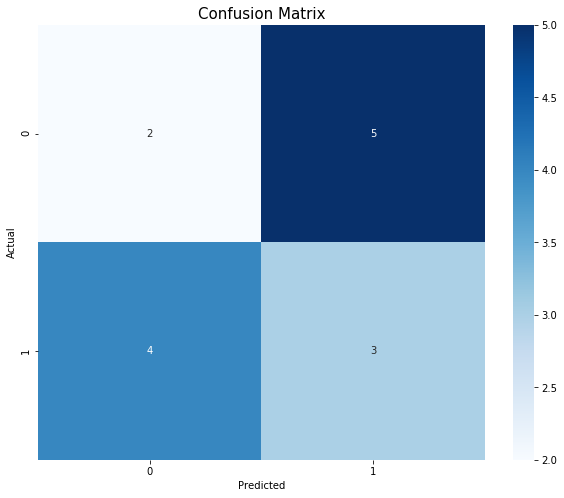

In [15]:
#Confusion Matrix Heatmap basic example 2 classes
exdata = {'ypredicted': [0,1,1,0,0,0,1,0,1,0,1,1,1,1], 'yactual':[1,0,1,1,1,1,0,0,1,0,1,0,0,0]}
exdf = pd.DataFrame(exdata, columns=['yactual','ypredicted'])
confusionmatrix = pd.crosstab(exdf['yactual'], exdf['ypredicted'], rownames=['Actual'], colnames=['Predicted']) #can add ,margins=True for total
plt.figure(figsize=(10, 8))
sn.heatmap(confusionmatrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix', size=15)

In [6]:
!pip install pandas_ml

     |████████████████████████████████| 102kB 4.7MB/s 


In [7]:
#Confusion Matrix Stats 
from pandas_ml import ConfusionMatrix
exdata = {'ypredicted': [0,1,1,0,0,0,1,0,1,0,1,1,1,1], 'yactual':[1,0,1,1,1,1,0,0,1,0,1,0,0,0]}
cm = ConfusionMatrix(exdata['yactual'], exdata['ypredicted'])
cm.print_stats()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



population: 14
P: 7
N: 7
PositiveTest: 8
NegativeTest: 6
TP: 3
TN: 2
FP: 5
FN: 4
TPR: 0.42857142857142855
TNR: 0.2857142857142857
PPV: 0.375
NPV: 0.3333333333333333
FPR: 0.7142857142857143
FDR: 0.625
FNR: 0.5714285714285714
ACC: 0.35714285714285715
F1_score: 0.4
MCC: -0.28867513459481287
informedness: -0.2857142857142858
markedness: -0.29166666666666674
prevalence: 0.5
LRP: 0.6
LRN: 2.0
DOR: 0.3
FOR: 0.6666666666666666


In [1]:
from google.colab import files
uploaded = files.upload()

#THIS RELIES ON MANUALLY UPLOADING THE IRIS DATASET - EASY TO FIND ONLINE

Saving Iris.csv to Iris.csv


In [8]:
#Iris dataset 
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
#Test train split
from sklearn.model_selection import train_test_split
x = iris.iloc[:,0:4].values
y = iris.iloc[:,5].values
#Encodes categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 0)

In [10]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)
predictions = logmodel.predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Text(33.0, 0.5, 'Actual')

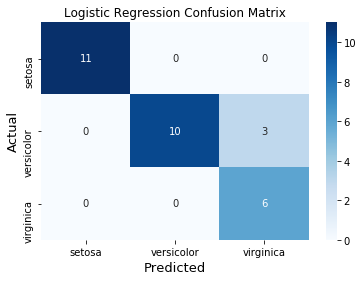

In [11]:
#3 Classes Iris Dataset Example 
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
cfm = confusion_matrix(ytest, predictions) 
cfmheat = pd.DataFrame(cfm, index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
#confusionmatrix = pd.crosstab(cfmheat[index], cfm[columns], rownames=['Actual'], colnames=['Predicted'],  margins = True)
sn.heatmap(cfmheat, annot=True,cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
#setosa and virginica is predicted perfectly, while there are problems with versicolor 

In [12]:
#from sklearn.metrics import classification_report
#print(classification_report(ytest,predictions))
#Confusion Matrix Stats 
cfmstats = ConfusionMatrix(ytest, predictions)
cfmstats.print_stats()

Confusion Matrix:

Predicted   0   1  2  __all__
Actual                       
0          11   0  0       11
1           0  10  3       13
2           0   0  6        6
__all__    11  10  9       30


Overall Statistics:

Accuracy: 0.9
95% CI: (0.7347115495257919, 0.9788828629702774)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.8876419625835964e-09
Kappa: 0.8487394957983193
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1         2
Population                                   30        30        30
P: Condition positive                        11        13         6
N: Condition negative                        19        17        24
Test outcome positive                        11        10         9
Test outcome negative                        19        20        21
TP: True Positive                            11        10         6
TN: True Negative                            19        17        21
FP: False Positive       

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning:

supplying multiple axes to axis is deprecated and will be removed in a future version.

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:344: RuntimeWarning:

divide by zero encountered in double_scalars



In [0]:
#MUST USE PLOTLY CREDENTIALS
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
#key = 'USE YOUR OWN KEY'
#plotly.tools.set_credentials_file(username='USE YOUR OWN CREDENTIALS', api_key=key)

**ROC AND PRC EXAMPLES**

In [0]:
#Create a simulated dataset in which men and women are totally separable by height.

men = np.round(np.random.normal(size = 1000, loc = 72, scale = 3))
women = np.round(np.random.normal(size = 1000, loc = 52, scale = 3))

#Assign the true classes to men and women in the dataset
m_class = [1]*1000
w_class = [0]*1000

#Create separate dataframes for men and women
men_df = pd.DataFrame({'height':men, 'is_man':m_class})
women_df = pd.DataFrame({'height':women,'is_man':w_class})

#Concatenate them together, predict class according to a heuristic (THIS WAS NOT USED)
df1 = pd.concat([men_df, women_df])
df1['pred_class'] = df1['height'].apply(lambda x: 1 if x > 62 else 0)


In [0]:
#Use plotly to plot the distributions
hist_data = [men, women]

group_labels = ['Men', 'Women']
colors = ['#333F44', '#37AA9C', '#94F3E4']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=True, 
                         show_rug =False, colors=colors, curve_type = 'normal')
# Add title
fig['layout'].update(title='Men and Women Completely Distinct',showlegend=True,
                    xaxis=dict(title='Height, inches'), yaxis=dict(title='Density'))
# Plot!
py.iplot(fig, filename='MenWomen Distinct')


In [0]:
#Split into X and Y
X = df1['height'].as_matrix().reshape(-1,1)
y = df1['is_man'].as_matrix().reshape(-1,1)
#Run logistic regression, generate probabilistic predictions of being male, add to dataset
reg = LogisticRegression().fit(X,y)
preds = reg.predict_proba(X)
df1['lr_pred'] = preds[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:
lw = 2
from sklearn.metrics import roc_curve, auc
#Fit logistic regression model, make probability predictions
X = df1['height'].as_matrix().reshape(-1,1)
y = df1['is_man'].as_matrix().reshape(-1,1)
reg = LogisticRegression().fit(X,y)
preds = reg.predict_proba(X)
df1['lr_pred'] = preds[:,1]
#Calculate roc curve
fpr1, tpr1, thresholds1 = roc_curve(df1['is_man'], df1['lr_pred'])
roc_auc1 = auc(fpr1, tpr1)
#Graph
trace1 = go.Scatter(x=fpr1, y=tpr1, 
                    mode='lines', 
                    line=dict(color='#37AA9C', width=4),
                    name='ROC curve (AUC = %0.2f)' % roc_auc1,
                    showlegend=True
                   )

layout = {
    'title': 'ROC for perfectly separable data',
    'xaxis': {'title':'False positive rate','range': [0, 1]},
    'yaxis': {'title':'True positive rate','range': [0, 1]},
    'shapes': [{
            'type': 'line',
            'x0': 0,'y0': 0,'x1': 1,'y1': 1,
            'line': {
                'color': '#333F44',
                'width': 4,
                'dash': 'dot',
            },
        },
    ]
}

fig = go.Figure(data=[trace1], layout=layout)
fig['layout'].update(width=650, height=500, autosize=False)
py.iplot(fig, equal_axes = True, filename='roc1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1.0, '2-class Precision-Recall curve: Average Precision=1.00')

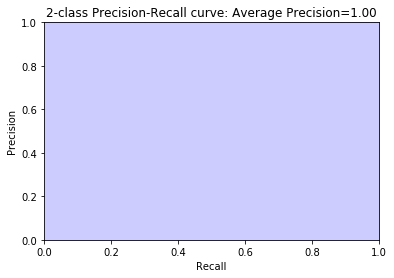

In [0]:
#Imports
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
#Find average precision of model
average_precision = average_precision_score(df1['is_man'], df1['pred_class'])
#Generate curve
precision, recall, _ = precision_recall_curve(df1['is_man'], df1['pred_class'])
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
#Labeling graph
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average Precision={0:0.2f}'.format(
          average_precision))

**Men and women totally inseparable by height**

In [0]:
men2 = np.round(np.random.normal(size = 1000, loc = 62, scale = 3))
women2 = np.round(np.random.normal(size = 1000, loc = 62, scale = 3))


m2_class = [1]*1000
w2_class = [0]*1000

men2_df = pd.DataFrame({'height':men2, 'is_man':m2_class})
women2_df = pd.DataFrame({'height':women2,'is_man':w2_class})

df2 = pd.concat([men2_df, women2_df])
df2['pred_class'] = df2['height'].apply(lambda x: 1 if x > 62 else 0)

In [0]:

hist_data = [men2, women2]

group_labels = ['Men', 'Women']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=True, show_rug =False, colors=colors, curve_type = 'normal')

# Add title
fig['layout'].update(title='No Gender Difference',showlegend=True,
                    xaxis=dict(title='Height, inches'), yaxis=dict(title='Density'))

# Plot!
py.iplot(fig, filename='MenWomen Overlap')

In [0]:
X = df2['height'].as_matrix().reshape(-1,1)
y = df2['is_man'].as_matrix().reshape(-1,1)
reg = LogisticRegression().fit(X,y)
preds = reg.predict_proba(X)
df2['lr_pred'] = preds[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:
fpr2, tpr2, thresholds = roc_curve(df2['is_man'], df2['lr_pred'])
roc_auc2 = auc(fpr2, tpr2)

lw = 2

trace2 = go.Scatter(x=fpr2, y=tpr2, 
                    mode='lines', 
                    line=dict(color='#37AA9C', width=lw),
                    name='ROC curve (AUC = %0.2f)' % roc_auc2,
                    showlegend=True
                   )

layout = {
    'title': 'ROC for perfectly overlapping data',
    'xaxis': {'title':'False positive rate','range': [0, 1]},
    'yaxis': {'title':'True positive rate','range': [0, 1]},
    'shapes': [{
            'type': 'line',
            'x0': 0,'y0': 0,'x1': 1,'y1': 1,
            'line': {
                'color': '#333F44',
                'width': 4,
                'dash': 'dot',
            },
        },
    ]
}

fig = go.Figure(data=[trace2], layout=layout)
fig['layout'].update(width=650, height=500, autosize=False)
py.iplot(fig, equal_axes = True, filename='roc2')

Text(0.5, 1.0, '2-class Precision-Recall curve: Average Precision=0.50')

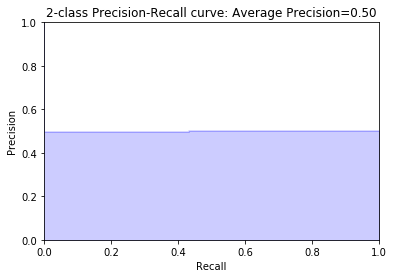

In [0]:
average_precision = average_precision_score(df2['is_man'], df2['pred_class'])

precision, recall, _ = precision_recall_curve(df2['is_man'], df2['pred_class'])
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average Precision={0:0.2f}'.format(
          average_precision))

In [0]:
men3 = np.round(np.random.normal(size = 1000, loc = 70, scale = 3.5))
women3 = np.round(np.random.normal(size = 1000, loc = 65, scale = 3.5))


m3_class = [1]*1000
w3_class = [0]*1000

men3_df = pd.DataFrame({'height':men3, 'is_man':m3_class})
women3_df = pd.DataFrame({'height':women3,'is_man':w3_class})

df3 = pd.concat([men3_df, women3_df])
df3['pred_class'] = df3['height'].apply(lambda x: 1 if x > 67.5 else 0)

In [0]:
hist_data = [men3, women3]

group_labels = ['Men', 'Women']
colors = ['#333F44', '#37AA9C', '#94F3E4']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=True, show_rug =False, colors=colors, curve_type = 'normal')

# Add title
fig['layout'].update(title='Real Heights',showlegend=True,
                    xaxis=dict(title='Height, inches'), yaxis=dict(title='Density'))

# Plot!
py.iplot(fig, filename='MenWomen Real')

In [0]:
X = df3['height'].as_matrix().reshape(-1,1)
y = df3['is_man'].as_matrix().reshape(-1,1)
reg = LogisticRegression().fit(X,y)
preds = reg.predict_proba(X)
df3['lr_pred'] = preds[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:

from sklearn.metrics import roc_curve, auc
fpr3, tpr3, thresholds = roc_curve(df3['is_man'], df3['lr_pred'])
roc_auc3 = auc(fpr3, tpr3)

lw = 2

trace3 = go.Scatter(x=fpr3, y=tpr3, 
                    mode='lines', 
                    line=dict(color='#37AA9C', width=lw),
                    name='ROC curve (AUC = %0.2f)' % roc_auc3,
                    showlegend= True
                   )

layout = {
    'title': 'ROC for real-world data',
    'xaxis': {'title':'False positive rate','range': [0, 1]},
    'yaxis': {'title':'True positive rate','range': [0, 1]},
    'shapes': [{
            'type': 'line',
            'x0': 0,'y0': 0,'x1': 1,'y1': 1,
            'line': {
                'color': '#333F44',
                'width': 4,
                'dash': 'dot',
            },
        },
    ]
}

fig = go.Figure(data=[trace3], layout=layout)
fig['layout'].update(width=650, height=500, autosize=False)
py.iplot(fig, equal_axes = True, filename='roc3')

Text(0.5, 1.0, '2-class Precision-Recall curve: Average Precision=0.71')

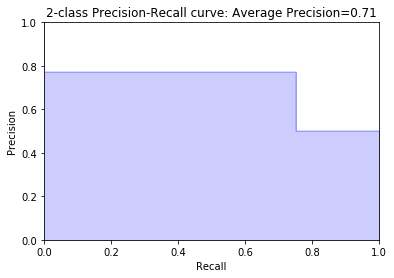

In [0]:
average_precision = average_precision_score(df3['is_man'], df3['pred_class'])

precision, recall, _ = precision_recall_curve(df3['is_man'], df3['pred_class'])
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average Precision={0:0.2f}'.format(
          average_precision))

In [0]:
trace4 = go.Scatter(x=fpr1, y=tpr1, 
                    mode='lines', 
                    line=dict(color='#C3E5E1', width=4),
                    name='ROC curve (AUC = %0.2f)' % roc_auc1,
                    showlegend=True
                   )
trace5 = go.Scatter(x=fpr2, y=tpr2, 
                    mode='lines', 
                    line=dict(color='#10332F', width=2),
                    name='ROC curve (AUC = %0.2f)' % roc_auc2,
                    showlegend=True
                   )
trace6 = go.Scatter(x=fpr3, y=tpr3, 
                    mode='lines', 
                    line=dict(color='#37AA9C', width=2),
                    name='ROC curve (AUC = %0.2f)' % roc_auc3,
                    showlegend=True
                   )

In [0]:
fpr, tpr, thresholds = roc_curve(df1['is_man'], df1['lr_pred'])
roc_auc = auc(fpr, tpr)

lw = 2

layout = {
    'title': 'ROCs for more or less accurate models',
    'xaxis': {'title':'False positive rate','range': [0, 1]},
    'yaxis': {'title':'True positive rate','range': [0, 1]},
    'shapes': [{
            'type': 'line',
            'x0': 0,'y0': 0,'x1': 1,'y1': 1,
            'line': {
                'color': '#333F44',
                'width': 4,
                'dash': 'dot',
            },
        },
    ]
}

fig = go.Figure(data=[trace4,trace6,trace5], layout=layout)
fig['layout'].update(width=650, height=500, autosize=False)
py.iplot(fig, equal_axes = True, filename='roc4')